### select a dataset from Kaggle. The objective is to perform clustering on the dataset and evaluate the results using the Silhouette Coefficient. Apply the K-Means algorithm to group the data and ensure you provide an analysis explaining why the data is being divided into specific groups.?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data & Rename Columns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head(10)

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df_Short = df[['Income','Spending_Score']]
df_Short.head(10)

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


# Silhouette Method to Indentify Clusters

In [5]:
import sklearn.metrics as metrics

ModuleNotFoundError: No module named 'sklearn'

In [10]:
import sklearn.cluster as cluster

In [11]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200, n_init=10).fit(df_Short).labels_
    score = metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.53976103063432
Silhouette score for k(clusters) = 7 is 0.5321706886465517
Silhouette score for k(clusters) = 8 is 0.4573261175268683
Silhouette score for k(clusters) = 9 is 0.4565077334305075
Silhouette score for k(clusters) = 10 is 0.4524923791729668
Silhouette score for k(clusters) = 11 is 0.432531674502324
Silhouette score for k(clusters) = 12 is 0.4254858960373971


In [12]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,3,0.467614
1,4,0.493196
2,5,0.553932
3,6,0.539761
4,7,0.532171
5,8,0.457326
6,9,0.456508
7,10,0.452492
8,11,0.432532
9,12,0.425486


<Axes: xlabel='Clusters', ylabel='Sil Score'>

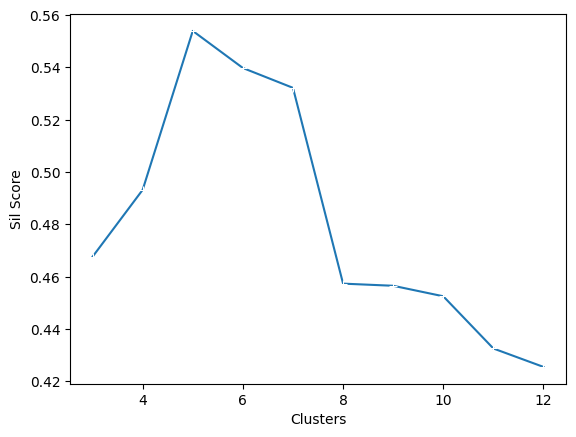

In [13]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

## -- Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

# Perform K-Mean Clustering with 5 Clusters

In [14]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++" , n_init=10)
kmeans = kmeans.fit(df[['Spending_Score','Income']])

# Plot Clusters on Chart

In [15]:
df['Clusters'] = kmeans.labels_


In [16]:
kmeans.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

<Axes: xlabel='Spending_Score', ylabel='Income'>

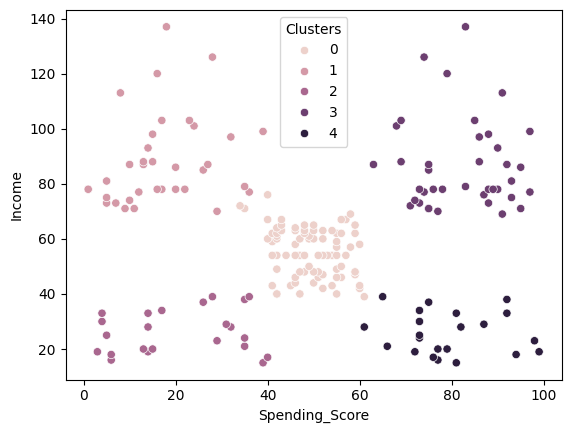

In [17]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

# END